In [176]:
import pandas as pd
import numpy as np
import seaborn as sns

In [195]:
# Upload OSAGO data and license_plates-VIN dictionary
fleet = pd.read_csv('C:/Users/sgulbin/Work/Data/fleet_data.csv')
osago = pd.read_csv('\\\\delimobil.local/Delimobil/Risk/Страхование/Убыточность 2020/Ren_OSAGO_losses.csv')
ic = pd.read_csv('\\\\delimobil.local/Delimobil/Risk/Страхование/Убыточность 2020/osago_ins_companies_vins.csv')

In [196]:
# Replace latin characters with corresponding cyrillic
fleet.license_plate_number = fleet.license_plate_number.str.replace('a','А')
fleet.license_plate_number = fleet.license_plate_number.str.replace('b','В')
fleet.license_plate_number = fleet.license_plate_number.str.replace('c','С')  
fleet.license_plate_number = fleet.license_plate_number.str.replace('e','Е')
fleet.license_plate_number = fleet.license_plate_number.str.replace('h','Н')
fleet.license_plate_number = fleet.license_plate_number.str.replace('k','К') 
fleet.license_plate_number = fleet.license_plate_number.str.replace('m','М')
fleet.license_plate_number = fleet.license_plate_number.str.replace('o','О')
fleet.license_plate_number = fleet.license_plate_number.str.replace('p','Р')  
fleet.license_plate_number = fleet.license_plate_number.str.replace('t','Т')
fleet.license_plate_number = fleet.license_plate_number.str.replace('x','Х')
fleet.license_plate_number = fleet.license_plate_number.str.replace('y','У')
# Add insurance company to fleet
fleet.VIN = fleet['VIN'].str.upper()
fleet.license_plate_number = fleet.license_plate_number.str.upper()
fleet = pd.merge(fleet, ic, on = 'VIN', how = 'left')
fleet = fleet[['license_plate_number','VIN', 'ins_company']]

In [205]:
# Changing date format to datetime
osago['accident_dt'] = pd.to_datetime(osago['Дата страхового случая        '])
osago['policy_start_dt'] = pd.to_datetime(osago['Дата начала срока страхования      '])
osago['policy_end_dt'] = pd.to_datetime(osago['Дата окончания срока страхования      '])
# Slicing repairs data
dtp.license_plate = dtp.license_plate.str.upper()
repairs = dtp.loc[(dtp['Responsibility'] == 'Виновен')&(dtp.pool == 'No')]
# Adding insurance company to repairs data
repairs = pd.merge(repairs, fleet, left_on = 'license_plate', right_on = 'license_plate_number', how = 'left')
ren_repairs = repairs.loc[repairs.ins_company == 'Ренессанс']
# Slicing osago and repairs data
osago19 = osago.loc[(osago['accident_dt'] > '2018-12-31')&(osago.accident_dt <='2019-10-01')]
ren_repairs19 = ren_repairs.loc[(ren_repairs['dt']> '2018-12-31')&(ren_repairs['dt']<='2019-10-01')]
ren_repairs20 = ren_repairs.loc[(ren_repairs['dt']>'2019-12-31')&(ren_repairs['dt']<'2020-04-01')]
# Printing stats
print(ren_repairs19.dt.count())#/(osago19['Кол-во урегулированных убытков'].sum()+osago19['Кол-во неурегулированных убытков'].sum()))
print(ren_repairs20.dt.count())
print(osago19['Кол-во урегулированных убытков'].sum())
print(osago19['Кол-во урегулированных убытков'].sum()+osago19['Кол-во неурегулированных убытков'].sum())
print(osago19['Сумма урегулированных убытков '].sum())
print(osago19['Сумма урегулированных убытков '].sum()/osago19['Кол-во урегулированных убытков'].sum())

5334
2218
2347
3313
200018293.24
85222.96260758415


In [204]:
(2218/1.61)*85222.96260

117406541.02285713

(0, 40000)

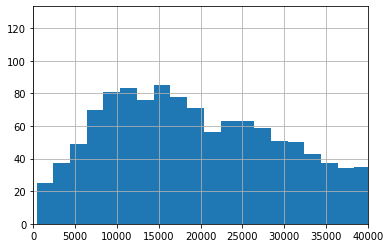

In [188]:
# Plotting osago loss distribution and repairs'
osagoplt = osago19.loc[osago19['Кол-во урегулированных убытков']>0]
repairsplt = ren_repairs19.loc[pd.isnull(ren_repairs19['target_amount']) == False]
# hist = repairsplt['target_amount'].hist(bins = 400)
hist = osagoplt['Сумма урегулированных убытков '].hist(bins = 400)
hist.set_xlim(0, 40000)

In [98]:
# Changing date format to datetime
osago['accident_dt'] = pd.to_datetime(osago['Дата страхового случая        '])
osago['policy_start_dt'] = pd.to_datetime(osago['Дата начала срока страхования      '])
osago['policy_end_dt'] = pd.to_datetime(osago['Дата окончания срока страхования      '])
# Slicing osago and repairs data
osago19 = osago.loc[osago['accident_dt'] > '2018-12-31']
dtp19 = dtp.loc[(dtp['dt']> '2018-12-31')&(dtp['dt']<='2019-10-01')]
dtp19_glty = dtp19.loc[(dtp19['Responsibility'] == 'Виновен')&(dtp19.target_amount > 0)]
# Adding license plate numbers to osago df
fleet.VIN = fleet['VIN'].str.upper()
fleet_mrg = fleet[['license_plate_number','VIN']]
osago19 = pd.merge(osago19, fleet_mrg, left_on = 'VIN                 ', right_on = 'VIN', how = 'left')
# Adding accident index
osago19['acc_index'] = osago19['accident_dt'].astype(str)+'-'+osago19['license_plate_number'].astype(str)
dtp19_glty['acc_index']= dtp19_glty['dt'].astype(str)+'-'+dtp19_glty['license_plate'].astype(str)
# Calculating average loss time by vehicle model
osago_grpd = osago19.groupby('Марка модель').sum()
osago_grpd = osago_grpd[['Кол-во урегулированных убытков','Сумма урегулированных убытков ','Кол-во неурегулированных убытков']]
dtp_grpd = dtp19_glty.groupby('vehicle_model').mean()
dtp_grpd = dtp_grpd[['target_amount']]
# Calculating average osago loss
osago_grpd['avg_adjusted_loss'] = osago_grpd['Сумма урегулированных убытков ']/osago_grpd['Кол-во урегулированных убытков']
osago_grpd = osago_grpd[['avg_adjusted_loss']]
# Replacing vehicle model names in repairs with good ones from osago
dtp_grpd.rename(index={'320i':'BMW 3-series', 'Kaptur':'Renault Kaptur', 'Polo': 'Volkswagen Polo', 'QASHQAI':'Nissan Qashqai',\
                       'Rio':'Kia Rio', 'Solaris':'Hyundai Solaris'},inplace=True)
# Merging avg osago loss and repairs by vehicle model
mrg = pd.merge(osago_grpd, dtp_grpd, left_on =osago_grpd.index , right_on = dtp_grpd.index, how = 'left')
mrg = mrg.loc[pd.isnull(mrg.avg_adjusted_loss) == False]
mrg.columns = ['vehicle_model', 'avg_adjusted_osago_loss','avg_repair_cost']
mrg['ratio'] = mrg['avg_adjusted_osago_loss']/mrg['avg_repair_cost']
mrg

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,vehicle_model,avg_adjusted_osago_loss,avg_repair_cost,ratio
0,BMW 3-series,73472.371962,200620.711646,0.366225
2,Hyundai Solaris,83823.569374,47932.570590,1.748781
4,Nissan Qashqai,78833.222222,56226.956739,1.402054
5,Renault Kaptur,144960.644758,93899.257882,1.543789
7,Volkswagen Polo,81063.429991,60035.840717,1.350251


In [7]:
# Upload repairs data
dtp = pd.read_excel('C:/Users/sgulbin/Work/_Выгрузки_и_Расчеты/accidents_4_10_2020.xlsx')
dtp['Дата и время ДТП'] = np.where(
    dtp['Дата и время ДТП']=='4/18/2020 12:00:00 AM', '3/18/2020 12:00:00 AM', dtp['Дата и время ДТП']
)
dtp['Дата и время ДТП'] = np.where(
    dtp['Дата и время ДТП']=='4/20/2020 12:00:00 AM', '3/20/2020 12:00:00 AM', dtp['Дата и время ДТП']
)
dtp['Дата и время ДТП'] = np.where(
    dtp['Дата и время ДТП']=='5/24/2020 12:00:00 AM', '3/24/2020 12:00:00 AM', dtp['Дата и время ДТП']
)
dtp['Дата и время ДТП'] = np.where(
    dtp['Дата и время ДТП']=='7/23/2020 12:00:00 AM', '3/23/2020 12:00:00 AM', dtp['Дата и время ДТП']
)
dtp['Дата и время ДТП'] = pd.to_datetime(dtp['Дата и время ДТП'], dayfirst=False, errors = 'coerce')
dtp.sort_values('Дата и время ДТП', inplace=True)
dtp['Дата и время ДТП'] = pd.to_datetime(dtp['Дата и время ДТП'])
dtp = dtp[dtp['Телефон водителя'].notnull()]
dtp['Телефон водителя'] = dtp['Телефон водителя'].apply(int)
dtp = dtp[dtp['ТС'].notnull()]
dtp.reset_index(drop=True, inplace = True)
dtp['ТС'] = dtp['ТС'].str.replace(' ', '')
dtp = dtp[['Дата и время ДТП', 'Регион','Телефон водителя', 'Виновность', 'ТС', 'Модель автомобиля', 'POOL', 'Тариф','Ремонт не производился','Тип ДТП', 'Вид страхования', 'Пострадавшие','Сумма по заказ-наряду','Выставлено', 'Страховая компания сумма выплаченная']].rename(columns={
    'Дата и время ДТП': 'dt',
    'Регион': 'region',
    'Телефон водителя': 'phone',
    'Виновность': 'Responsibility',
    'ТС': 'license_plate',
    'Модель автомобиля': 'vehicle_model',
    'POOL': 'pool',
    'Тариф': 'tariff',
    'Ремонт не производился': 'no repair conducted',
    'тип ДТП': 'accident type',
    'Вид страхования': 'insurance type',
    'Пострадавшие': 'injured',
    'Сумма по заказ-наряду': 'target_amount',
    'Выставлено': 'Vystavleno',
    'Страховая компания сумма выплаченная': 'insurance paid sum'
})